In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv(r'Titanic-Dataset.csv')

In [70]:
print("First 5 rows")
data.head()

First 5 rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
print("\nDataset Summary: ")

data.describe(include='all')


Dataset Summary: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [73]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [74]:
data_clean = data.drop(columns = ['Cabin'])
age_median = data_clean['Age'].median()

data_clean['Age'] = data_clean['Age'].fillna(age_median)
embarked_mode = data_clean['Embarked'].mode()[0]

data_clean['Embarked'] = data_clean['Embarked'].fillna(embarked_mode)
print(data_clean.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [75]:
before = data_clean[['Age', 'Fare']].head()

age_min, age_max = data_clean['Age'].min(), data_clean['Age'].max()
fare_min, fare_max = data_clean['Fare'].min(), data_clean['Fare'].max()

data_clean['Age'] = (data_clean['Age'] - age_min)/(age_max-age_min)
data_clean['Fare'] = (data_clean['Fare'] - fare_min)/(fare_max-fare_min)

after = data_clean[['Age', 'Fare']].head()

print("Before scaling:\n",before)
print("\nAfter scaling:\n",after)

Before scaling:
     Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

After scaling:
         Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


In [76]:
data_enc = pd.get_dummies(data_clean, columns = ['Sex','Embarked'], drop_first = True)
print(data_enc[['Sex_male','Embarked_Q','Embarked_S']].head())

   Sex_male  Embarked_Q  Embarked_S
0      True       False        True
1     False       False       False
2     False       False        True
3     False       False        True
4      True       False        True


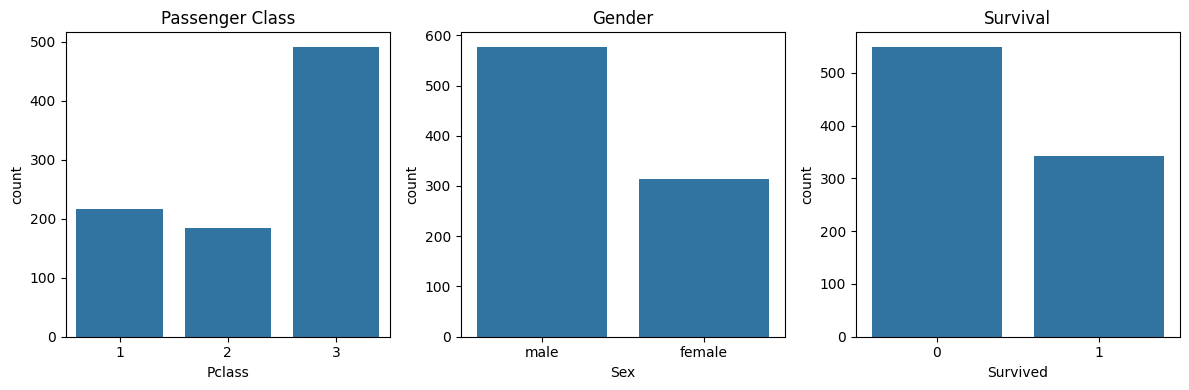

In [77]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.countplot(data=data_clean, x='Pclass')
plt.title('Passenger Class')

plt.subplot(1,3,2)
sns.countplot(data=data_clean, x='Sex')
plt.title('Gender')

plt.subplot(1,3,3)
sns.countplot(data=data_clean, x='Survived')
plt.title('Survival')

plt.tight_layout()
plt.show()

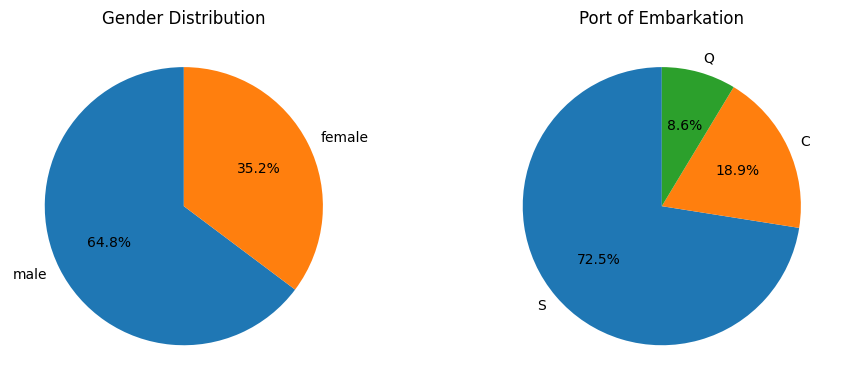

In [78]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
gender_counts = data_clean['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

plt.subplot(1,2,2)
emb_counts = data_clean['Embarked'].value_counts()
plt.pie(emb_counts, labels=emb_counts.index,autopct='%1.1f%%', startangle=90)
plt.title('Port of Embarkation')

plt.tight_layout()
plt.show()